In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torch.distributions import *
from distribution import *

# Set Seaborn color palette to colorblind-friendly
sns.set_palette("colorblind")

from tueplots import figsizes, bundles
plt.rcParams.update(bundles.icml2024())

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})

In [2]:
min_v, max_v = 0, 35
X = torch.linspace(min_v, max_v, 100).unsqueeze(1)

mean, std = 1., 5.

q = 0.99

n = Normal(loc=mean, scale=std)
fn = FoldedNormal(loc=mean, scale=std)

In [3]:
pdf_n = n.log_prob(X).exp()
pdf_fn = fn.log_prob(X).exp()
cdf_n = n.cdf(X)
cdf_fn = fn.cdf(X)

### see https://en.wikipedia.org/wiki/Folded_normal_distribution

Text(0, 0.5, 'pdf')

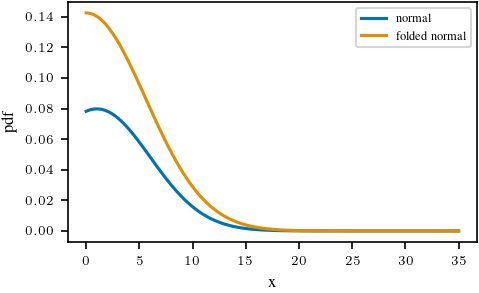

In [4]:
plt.plot(X.squeeze().detach().numpy(), pdf_n.squeeze().detach().numpy(), label='normal')
plt.plot(X.squeeze().detach().numpy(), pdf_fn.squeeze().detach().numpy(), label='folded normal')
plt.legend()
plt.xlabel('x')
plt.ylabel('pdf')

Text(0, 0.5, 'cdf')

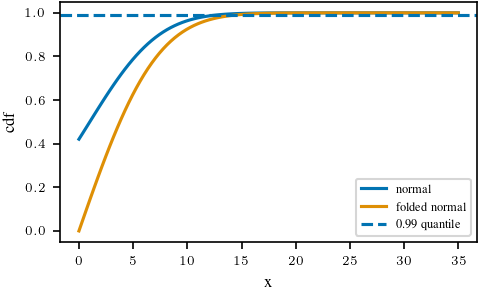

In [5]:
plt.plot(X.squeeze().detach().numpy(), cdf_n.squeeze().detach().numpy(), label='normal')
plt.plot(X.squeeze().detach().numpy(), cdf_fn.squeeze().detach().numpy(), label='folded normal')
plt.axhline(q, ls='--', label=f'{q} quantile')
plt.legend()
plt.xlabel('x')
plt.ylabel('cdf')


In [6]:
d_fn = DiscretizedDistribution(base_distribution={
    'class_name': 'distribution.FoldedNormal',
    'args': {
        'loc': mean,
        'scale': std
    }
}) 
d_fn.to('cpu')

In [7]:
X = torch.arange(min_v, max_v).unsqueeze(1).float()
pdf_d_fn = d_fn.log_prob(X).exp()
cdf_d_fn = d_fn.cdf(X)

/tmp/ipykernel_1485823/78587130.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


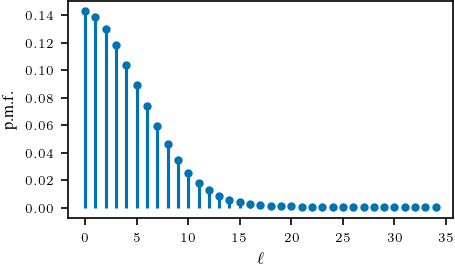

In [17]:
plt.rcParams.update(figsizes.icml2024_half())

markerline, stemline, baseline = plt.stem((X).squeeze().detach().numpy(), pdf_d_fn.squeeze().detach().numpy(), basefmt=" ")
plt.setp(markerline, markersize = 3)
plt.xlabel(rf'$\ell$')
plt.ylabel('p.m.f.')
plt.tight_layout()
plt.savefig('images/bounds-left.pdf')

/tmp/ipykernel_1485823/3616469693.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


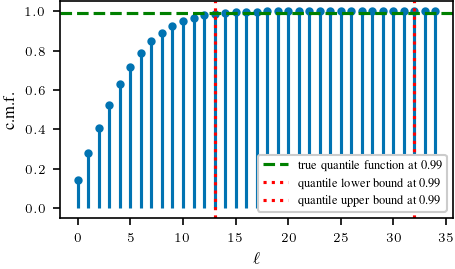

In [19]:
plt.rcParams.update(figsizes.icml2024_half())

l, u = fn.quantile(p=q)
l, u = torch.floor(l), torch.ceil(u)

X = torch.arange(min_v, max_v).unsqueeze(1).float()
markerline, stemline, baseline =  plt.stem((X).squeeze().detach().numpy(), cdf_d_fn.squeeze().detach().numpy(), basefmt=" ")
plt.setp(markerline, markersize = 3)

plt.axhline(q, ls='--', label='true quantile function at 0.99', c='green')
plt.axvline(l.numpy(), ls='dotted', label=f'quantile lower bound at 0.99', c='red')
plt.axvline(u.numpy(), ls='dotted', label=f'quantile upper bound at 0.99', c='red')
legend = plt.legend(loc='lower right')
legend.get_frame().set_alpha(None)
plt.xlabel(rf'$\ell$')
plt.ylabel('c.m.f.')
plt.tight_layout()
plt.savefig('images/bounds-right.pdf')

In [10]:
print(fn.quantile(p=q), d_fn.quantile(p=q))

(tensor([13.8105]), tensor([31.0943])) (tensor([14.]), tensor([14.]))


# 